In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
from sklearn.metrics import r2_score

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/optuna/study/_optimize.py:29: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


In [2]:
data_dir = "/lustre/groups/ml01/workspace/cell_flow_zebrafish/results/single_condition/cell_type_proportion"
out_dir = "/lustre/groups/ml01/workspace/cell_flow_zebrafish/results/single_condition/cell_type_proportion_downstream"

In [3]:
ood_conditions = ['zc4h2_control_24','met_control_36','tfap2a_control_72','hgfa_control_48','tfap2a_foxd3_72','noto_control_18','cdx4_cdx1a_36','epha4a_control_48','mafba_control_36','tbx16_msgn1_24','noto_control_24','smo_control_18','hand2_control_24','noto_control_36','egr2b_control_36','cdx4_control_18','tfap2a_control_36','foxi1_control_72','egr2b_control_24','cdx4_control_36','zc4h2_control_36','hoxb1a_control_48','tfap2a_foxd3_36','tbx16_tbx16l_24','smo_control_36','mafba_control_18','hgfa_control_72','tbx16_control_18','mafba_control_24','tbx1_control_36','zc4h2_control_48','wnt3a_wnt8_36','foxi1_control_48','smo_control_24','noto_control_48','mafba_control_48','tfap2a_control_48','hand2_control_48','egr2b_control_48','phox2a_control_48','tbx1_control_48','tbx16_msgn1_36','foxd3_control_72','wnt3a_wnt8_24','egr2b_control_18','wnt3a_wnt8_18','met_control_72','phox2a_control_36','epha4a_control_24','foxd3_control_36','tfap2a_foxd3_48','hand2_control_36','cdx4_cdx1a_24','hgfa_control_36','tbx16_tbx16l_18','tbxta_control_36','cdx4_control_24','foxd3_control_48','met_control_48','tbx1_control_24','epha4a_control_36','cdx4_cdx1a_18','tbx16_control_36','tbx16_tbx16l_36','tbx16_control_24','tbxta_control_24','tbx16_msgn1_18','epha4a_control_18','tbxta_control_18','hoxb1a_control_36','hoxb1a_control_24']
      

In [4]:
spearman_corrs = {}
pearson_corrs = {}
dfs = []
for ood_cond in ood_conditions:
    csv_file = [el for el in os.listdir(data_dir) if ((ood_cond in el) and ("csv" in el))]
    if len(csv_file)==0:
        continue
    assert len(csv_file) == 1
    df = pd.read_csv(os.path.join(data_dir, csv_file[0]))
    spearman_corrs[ood_cond] = df[["logratio_true", "logratio_pred"]].corr("spearman").iloc[0,1]
    pearson_corrs[ood_cond] = df[["logratio_true", "logratio_pred"]].corr("pearson").iloc[0,1]
    df["condition"] = f"{ood_cond}"
    dfs.append(df)

In [5]:
df_all = pd.concat(dfs)

In [6]:
df_all.head()

,cell_type_broad_transfer,ratio_pred,ratio_true,logratio_true,logratio_pred,condition
0,periderm,1.182168,1.349712,0.432652,0.241436,zc4h2_control_24
1,mature fast muscle,1.177825,1.242196,0.312892,0.236125,zc4h2_control_24
2,connective tissue-meninges-dermal FB,1.046386,0.899433,-0.152912,0.065415,zc4h2_control_24
3,neural progenitor (hindbrain),0.864279,0.775667,-0.366491,-0.210431,zc4h2_control_24
4,mature slow muscle,0.975546,1.205383,0.269492,-0.035718,zc4h2_control_24


In [7]:
brain = ['neural progenitor (hindbrain R7/8)',
 'neurons (differentiating, contains peripheral)',
 'neurons (gabaergic, glutamatergic)',
 'neural progenitor (diencephalon/telencephalon)',
 'neural progenitor (MHB)',
 'neural progenitor (hindbrain)']

In [12]:
df_all[(df_all["cell_type_broad_transfer"].isin(brain)) & (df_all["condition"]=="cdx4_cdx1a_18")]

,cell_type_broad_transfer,ratio_pred,ratio_true,logratio_true,logratio_pred,condition
0,neural progenitor (hindbrain),1.100754,1.111592,0.152627,0.138492,cdx4_cdx1a_18
6,neural progenitor (MHB),1.060559,1.036124,0.051197,0.084825,cdx4_cdx1a_18
7,neural progenitor (hindbrain R7/8),0.856767,0.729594,-0.454835,-0.223026,cdx4_cdx1a_18
23,neural progenitor (diencephalon/telencephalon),0.975276,0.838749,-0.253688,-0.036117,cdx4_cdx1a_18
34,"neurons (differentiating, contains peripheral)",0.838329,0.590604,-0.759736,-0.254411,cdx4_cdx1a_18
56,"neurons (gabaergic, glutamatergic)",0.590792,0.256220,-1.964544,-0.759277,cdx4_cdx1a_18


In [6]:
df_all["gene_target"] = df_all.apply(lambda x: "_".join(x["condition"].split("_")[:-1]), axis=1)

In [7]:
cols3 = ['hatching gland', 'floor plate', 'mature fast muscle', 'mature slow muscle', 'notochord', 'fast-committed myocyte (fusing)', 'fast-committed myocyte (pre-fusion)', 'slow-committed myocyte', 'mesodermal progenitor cells (contains PSM)']

In [8]:
df_red = df_all[(df_all["cell_type_broad_transfer"].isin(cols3)) & (df_all["gene_target"].isin(("noto_control", "tbxta_control")))]

In [9]:
df_red_pred = df_red[["condition", "logratio_pred", "cell_type_broad_transfer", "gene_target"]]

In [10]:
df_red_true = df_red[["condition", "logratio_true", "cell_type_broad_transfer", "gene_target"]]

In [11]:
df_red_true["logratio_true_sign"] = df_red_true["logratio_true"] > 0 
df_red_pred["logratio_pred_sign"] = df_red_pred["logratio_pred"] > 0 

/tmp/ipykernel_3806735/1652160588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red_true["logratio_true_sign"] = df_red_true["logratio_true"] > 0
/tmp/ipykernel_3806735/1652160588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red_pred["logratio_pred_sign"] = df_red_pred["logratio_pred"] > 0


In [12]:
df_red_true.to_csv("/home/icb/dominik.klein/tmp/df_red_true.csv")
df_red_pred.to_csv("/home/icb/dominik.klein/tmp/df_red_pred.csv")

In [29]:
df_spearman_between_cell_types = pd.DataFrame.from_dict(spearman_corrs, orient="index", columns=["condition"])
df_pearson_between_cell_types = pd.DataFrame.from_dict(pearson_corrs, orient="index", columns=["condition"])
df_spearman_between_cell_types["spearman_correlation"] = df_spearman_between_cell_types["condition"]
df_spearman_between_cell_types["condition"] = df_spearman_between_cell_types.index
df_pearson_between_cell_types["pearson_correlation"] = df_pearson_between_cell_types["condition"]
df_pearson_between_cell_types["condition"] = df_pearson_between_cell_types.index
df_spearman_between_cell_types.to_csv(os.path.join(out_dir, "spearman_between_cell_types.csv"))
df_pearson_between_cell_types.to_csv(os.path.join(out_dir, "pearson_between_cell_types.csv"))

In [14]:
df_pearson_between_conditions = pd.DataFrame(df_all.groupby(["cell_type_broad_transfer"])[["logratio_true", "logratio_pred"]].apply(lambda x: x.corr("pearson").iloc[0,1]), columns=["pearson_correlation"])
df_spearman_between_conditions = pd.DataFrame(df_all.groupby(["cell_type_broad_transfer"])[["logratio_true", "logratio_pred"]].apply(lambda x: x.corr("spearman").iloc[0,1]), columns=["spearman_correlation"])
df_spearman_between_conditions.to_csv(os.path.join(out_dir, "spearman_between_conditions.csv"))
df_pearson_between_conditions.to_csv(os.path.join(out_dir, "pearson_between_conditions.csv"))                   

In [15]:
df_noto = df_all[df_all["cell_type_broad_transfer"]=="notochord"]
df_noto.head()

,cell_type_broad_transfer,ratio_pred,ratio_true,logratio_true,logratio_pred,condition,gene_target
12,notochord,1.186926,1.099299,0.136583,0.247230,zc4h2_control_24,zc4h2_control
9,notochord,0.915847,0.464376,-1.106635,-0.126822,met_control_36,met_control
13,notochord,0.887887,1.380803,0.465508,-0.171553,tfap2a_control_72,tfap2a_control
17,notochord,0.803582,1.177119,0.235260,-0.315483,hgfa_control_48,hgfa_control
13,notochord,0.928420,0.858886,-0.219461,-0.107150,tfap2a_foxd3_72,tfap2a_foxd3


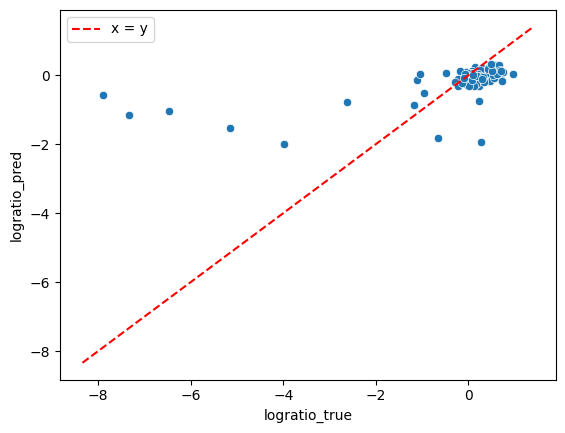

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Example scatterplot
sns.scatterplot(df_noto, x="logratio_true", y="logratio_pred")

# Get the axis limits
x_min, x_max = plt.gca().get_xlim()
y_min, y_max = plt.gca().get_ylim()

# Determine the range for the diagonal line
line_min = min(x_min, y_min)
line_max = max(x_max, y_max)

# Draw the diagonal line
plt.plot([line_min, line_max], [line_min, line_max], color="red", linestyle="--", label="x = y")

# Optional: Add a legend
plt.legend()

# Show the plot
plt.show()


In [18]:
df_mus_fast = df_all[df_all["cell_type_broad_transfer"]=="mature fast muscle"]

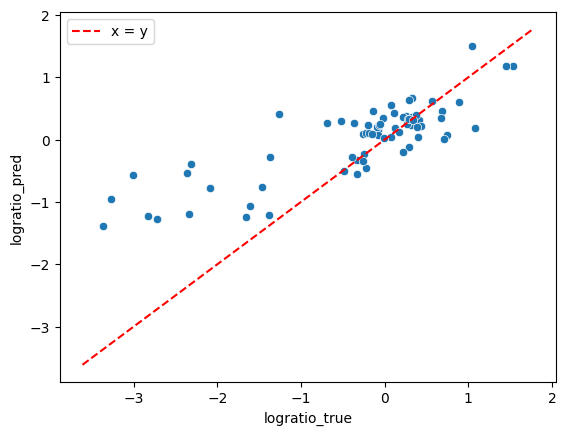

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# Example scatterplot
sns.scatterplot(df_mus_fast, x="logratio_true", y="logratio_pred")

# Get the axis limits
x_min, x_max = plt.gca().get_xlim()
y_min, y_max = plt.gca().get_ylim()

# Determine the range for the diagonal line
line_min = min(x_min, y_min)
line_max = max(x_max, y_max)

# Draw the diagonal line
plt.plot([line_min, line_max], [line_min, line_max], color="red", linestyle="--", label="x = y")

# Optional: Add a legend
plt.legend()

# Show the plot
plt.show()


In [20]:
df_mus_slow = df_all[df_all["cell_type_broad_transfer"]=="mature slow muscle"]

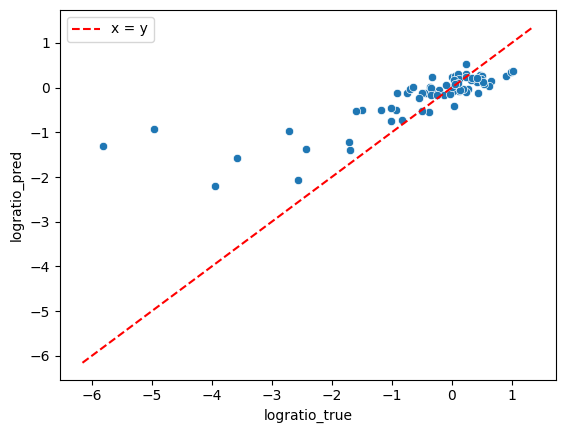

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

# Example scatterplot
sns.scatterplot(df_mus_slow, x="logratio_true", y="logratio_pred")

# Get the axis limits
x_min, x_max = plt.gca().get_xlim()
y_min, y_max = plt.gca().get_ylim()

# Determine the range for the diagonal line
line_min = min(x_min, y_min)
line_max = max(x_max, y_max)

# Draw the diagonal line
plt.plot([line_min, line_max], [line_min, line_max], color="red", linestyle="--", label="x = y")

# Optional: Add a legend
plt.legend()

# Show the plot
plt.show()


In [22]:
df_spearman_between_conditions.loc["mature fast muscle"]

spearman_correlation    0.719741
Name: mature fast muscle, dtype: float64

In [23]:
df_spearman_between_conditions.loc["mature slow muscle"]

spearman_correlation    0.818243
Name: mature slow muscle, dtype: float64

In [24]:
df_spearman_between_conditions.loc["notochord"]

spearman_correlation    0.560532
Name: notochord, dtype: float64

In [26]:
df_noto.to_csv(os.path.join(out_dir, "notochord_between_conditions.csv"))
df_mus_fast.to_csv(os.path.join(out_dir, "fast_muscle_between_conditions.csv"))
df_mus_slow.to_csv(os.path.join(out_dir, "slow_muscle_between_conditions.csv"))